## Final Project Map  
Final Project では被爆県広島の復興マップを作ろうと思う。  
そこで、原爆が落ちた範囲とpick upした場所をポイントマーカーにして、サークルマップを作る。

In [2]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Hiroshimadata4.csv')

In [7]:
df 

,name,latitude,longitude,color
0,爆心地,34.395446,132.455053,red
1,基町（原爆スラム/応急住宅）,34.398822,132.455094,green
2,原爆スラム（応急住宅）,34.403618,132.455518,lightgreen
3,旧広島市民球場,34.397163,132.455283,lightgreen
4,広島城 天守閣,34.402852,132.459184,blue
5,平和記念公園,34.392926,132.452394,lightblue
6,平和記念資料館,34.391725,132.453627,lightblue
7,広島女学院,34.399150,132.467081,lightgreen
8,原爆ドーム,34.395696,132.453552,orange
9,広島県庁,34.396776,132.460368,green


In [8]:
df.shape

(10, 4)

In [9]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       10 non-null     object 
 1   latitude   10 non-null     float64
 2   longitude  10 non-null     float64
 3   color      10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [10]:
df.columns.to_list()

['name', 'latitude', 'longitude', 'color']

In [11]:
df[['name','latitude','longitude']]

,name,latitude,longitude
0,爆心地,34.395446,132.455053
1,基町（原爆スラム/応急住宅）,34.398822,132.455094
2,原爆スラム（応急住宅）,34.403618,132.455518
3,旧広島市民球場,34.397163,132.455283
4,広島城 天守閣,34.402852,132.459184
5,平和記念公園,34.392926,132.452394
6,平和記念資料館,34.391725,132.453627
7,広島女学院,34.399150,132.467081
8,原爆ドーム,34.395696,132.453552
9,広島県庁,34.396776,132.460368


In [12]:
df['longitude']

0    132.455053
1    132.455094
2    132.455518
3    132.455283
4    132.459184
5    132.452394
6    132.453627
7    132.467081
8    132.453552
9    132.460368
Name: longitude, dtype: float64

In [13]:
df['latitude'].to_list()

[34.39544552,
 34.39882171,
 34.40361827,
 34.39716287,
 34.40285186,
 34.39292571,
 34.39172533,
 34.39914952,
 34.395696,
 34.39677554]

<Axes: >

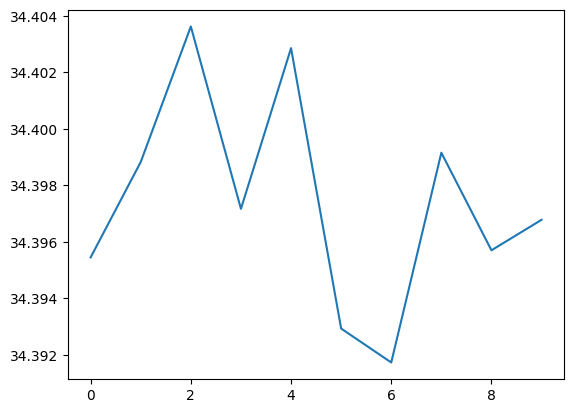

In [14]:
# line chart
df['latitude'].plot()

<Axes: >

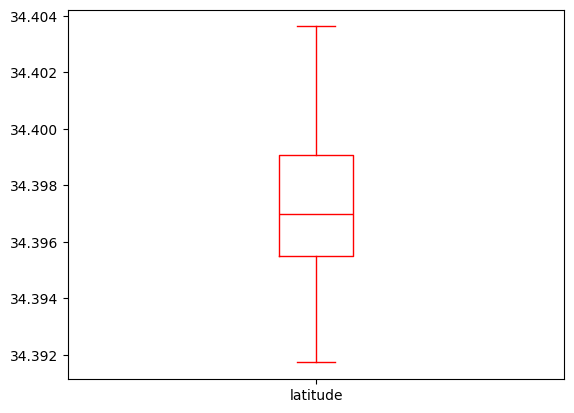

In [15]:
# boxplot 箱ヒゲ図
df['latitude'].plot.box(color='red')

<Axes: >

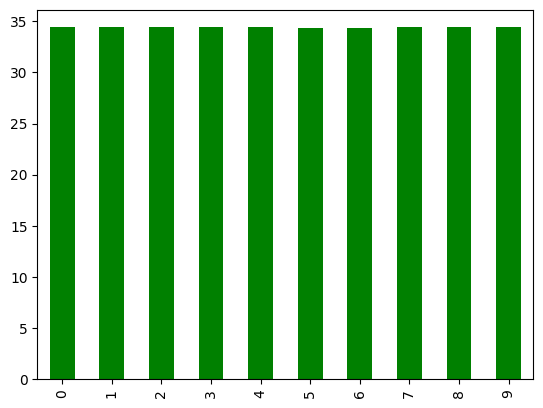

In [16]:
# bar graph
df['latitude'].plot.bar(color='green')

<Axes: xlabel='longitude', ylabel='latitude'>

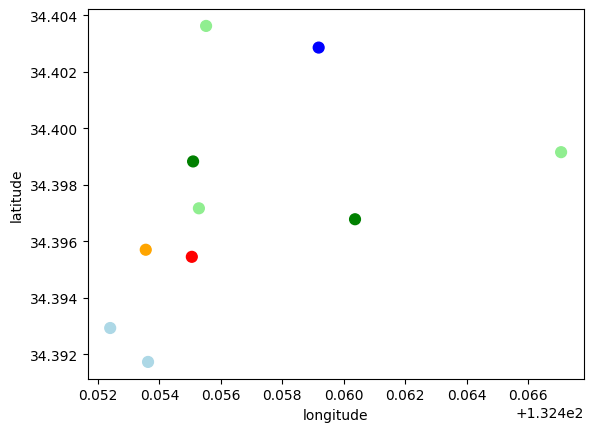

In [17]:
df.plot.scatter(x='longitude',y='latitude',c='color',s=60)

In [18]:
df['latitude'].describe()

count    10.000000
mean     34.397417
std       0.003842
min      34.391725
25%      34.395508
50%      34.396969
75%      34.399068
max      34.403618
Name: latitude, dtype: float64

In [19]:
df['longitude'].describe()

count     10.000000
mean     132.456716
std        0.004397
min      132.452394
25%      132.453983
50%      132.455189
75%      132.458268
max      132.467081
Name: longitude, dtype: float64

In [20]:
# mean 平均値
df['latitude'].mean()

34.397417233000006

In [21]:
# median 中央値
df['latitude'].median()

34.396969205000005

In [22]:
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

print(center_lat,center_lon)

34.397417233000006 132.45671552


In [23]:
for index, row in df.iterrows():
    print(row['name'],row['latitude'])

爆心地 34.39544552
基町（原爆スラム/応急住宅） 34.39882171
原爆スラム（応急住宅） 34.40361827
旧広島市民球場 34.39716287
広島城 天守閣 34.40285186
平和記念公園 34.39292571
平和記念資料館 34.39172533
広島女学院 34.39914952
原爆ドーム 34.395696
広島県庁 34.39677554


In [24]:
for index, row in df.iterrows():
    print(row['name'],row['latitude'],row['longitude'])

爆心地 34.39544552 132.4550527
基町（原爆スラム/応急住宅） 34.39882171 132.4550942
原爆スラム（応急住宅） 34.40361827 132.4555176
旧広島市民球場 34.39716287 132.4552834
広島城 天守閣 34.40285186 132.4591845
平和記念公園 34.39292571 132.4523943
平和記念資料館 34.39172533 132.453627
広島女学院 34.39914952 132.4670808
原爆ドーム 34.395696 132.4535523
広島県庁 34.39677554 132.4603684


## Make Map!

In [25]:
# make the map
m = folium.Map(location=[center_lat,center_lon],
               zoom_start=15,
               attr = '国土地理院')

# df をループしてマーカーを作る
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon,
                  popup='<div style="width:950px">'+row['name']+'</div>',
                  tooltip=row['name'],
                  icon=folium.Icon(color=row['color']
                )).add_to(m)
    
# サークルマーカープロット(外径色は赤，内径色は青)
folium.Circle(
    location=[34.39544552,132.4550527],
    radius=2000,
    color='#ff0000',
    fill_color='#0000ff'
).add_to(m)

# show the map
m

## Memo  
ここにleaf.mapというライブラリを入れて、国土地理院の写真を1945年のものを上乗せして、白黒にすることで、リアルな生きたマップを作ることができると思う。昔の白黒写真と現代の技術を使うことで新しいものが生まれるのは非常に興味深い発見だと思う。